In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sbn
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [6]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


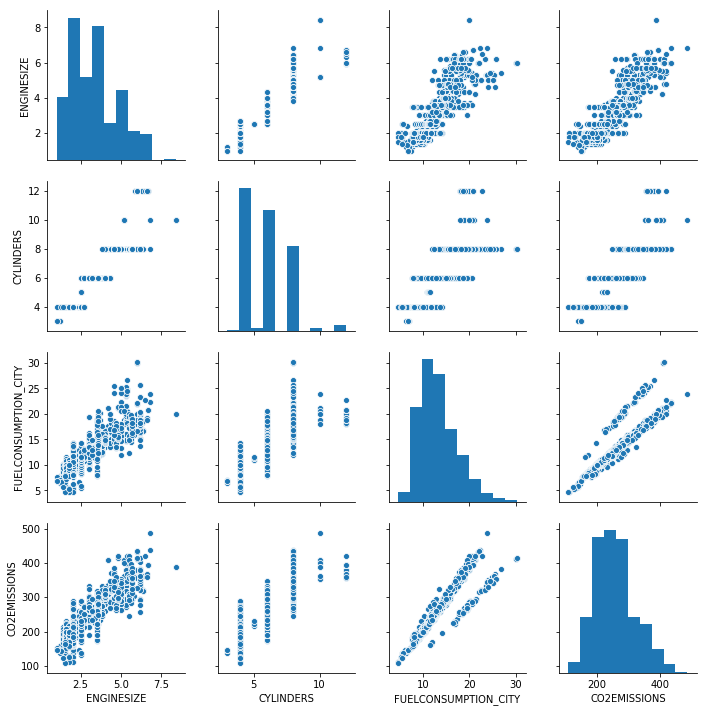

In [7]:
sbn.pairplot(df1)

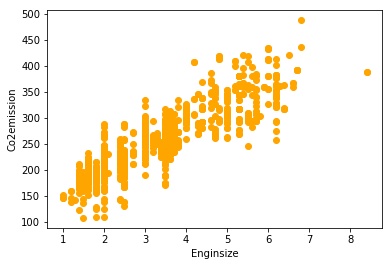

In [8]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color = 'orange')
plt.xlabel('Enginsize')
plt.ylabel('Co2emission')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df1[msk]
test = df1[~msk]

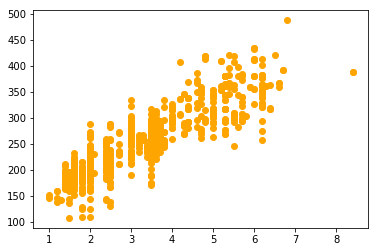

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'orange')

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coefficient :', regr.coef_)

Coefficient : [[11.41970252  6.65400613  8.0552856 ]]


In [13]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum of square : %.2f' %np.mean((y_hat - y) **2))
print('Varience score : %.2f' %regr.score(x,y))

Residual sum of square : 443.04
Varience score : 0.89


In [14]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [17]:
df2 = df[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df2.head()

,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,6.7,8.5,33,196
1,7.7,9.6,29,221
2,5.8,5.9,48,136
3,9.1,11.1,25,255
4,8.7,10.6,27,244


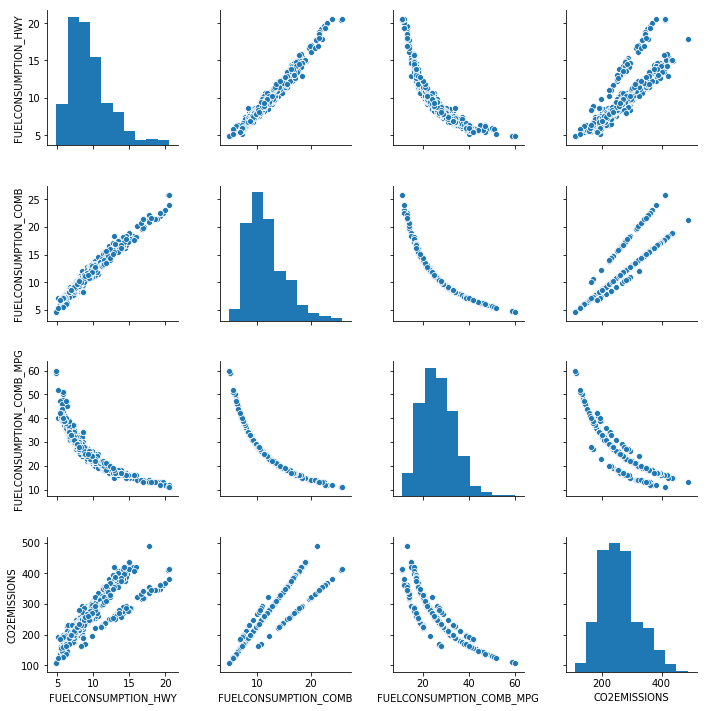

In [18]:
sbn.pairplot(df2)

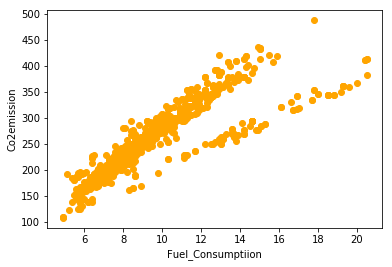

In [19]:
plt.scatter(df2.FUELCONSUMPTION_HWY, df2.CO2EMISSIONS, color = 'orange')
plt.xlabel('Fuel_Consumptiion')
plt.ylabel('Co2emission')
plt.show()

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = df2[msk]
test = df2[~msk]

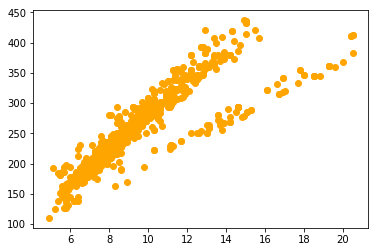

In [21]:
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color='orange')

In [22]:
x1 = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
y1 = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x1,y1)
print('Coefficient :',regr.coef_)

Coefficient : [[-4.69133404  9.90231179 -4.92971765]]


In [23]:
y1_hat = regr.predict(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
x1 = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
y1 = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of square : %.2f' %np.mean((y1_hat - y1) **2))
print('varience score : %.2f' %regr.score(x1, y1))

Residual sum of square : 668.16
varience score : 0.84
